#Prática 02 - Correlação de Pearson e Redução de Dimensionalidade
- Visando exercitar os conceitos aprendidos na aula de Redução de dimensionalidade  (Correlação de Pearson e PCA), escolha três base de dados que possuam atributos numéricos (int float) e discretos (object) no repositório abaixo  https://www.dropbox.com/sh/f6i1fj8qpjpud9c/AABMYB-Yfc7jTOZHB_qHPdGBa?dl=0 ou em  qualquer outro repositório.
\

Dataset escolhido: Waveform.csv, Ecoli.csv e Abalone.csv

In [15]:
# RESET COMPLETO - EXECUTE SEMPRE AO MUDAR DE DATASET
%reset -f
print("✅ Memória do Python resetada - pronto para novo dataset")

### Carregar as Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from collections import defaultdict

print("Bibliotecas carregadas")

### Importing Dataset
#dataset = pd.read_csv('Semeion.csv',encoding='utf-8')
# Importing dataset from GitHub RAW link
#url = 'https://raw.githubusercontent.com/Croncl/IMD3002-AM_SUPERVISIONADO/main/Waveform.csv'
#url = 'https://raw.githubusercontent.com/Croncl/IMD3002-AM_SUPERVISIONADO/main/Abalone.csv'
url = 'https://raw.githubusercontent.com/Croncl/IMD3002-AM_SUPERVISIONADO/main/Ecoli.csv'
dataset = pd.read_csv(url, encoding='utf-8')
dataset.info()

### Mostrando o dataset
dataset.head()

✅ Memória do Python resetada - pronto para novo dataset
Bibliotecas carregadas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     336 non-null    float64
 1   gvh     336 non-null    float64
 2   lip     336 non-null    float64
 3   chg     336 non-null    float64
 4   aac     336 non-null    float64
 5   alm1    336 non-null    float64
 6   alm2    336 non-null    float64
 7   class   336 non-null    object 
dtypes: float64(7), object(1)
memory usage: 21.1+ KB


,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [16]:
# Obtendo todas as colnas, exceto a última
dataset_X = dataset.iloc[:, :-1]

### print(atributos)
X = dataset_X           # Features
y = dataset.iloc[:, -1] # Target

print(X)

      mcg   gvh   lip  chg   aac  alm1  alm2
0    0.49  0.29  0.48  0.5  0.56  0.24  0.35
1    0.07  0.40  0.48  0.5  0.54  0.35  0.44
2    0.56  0.40  0.48  0.5  0.49  0.37  0.46
3    0.59  0.49  0.48  0.5  0.52  0.45  0.36
4    0.23  0.32  0.48  0.5  0.55  0.25  0.35
..    ...   ...   ...  ...   ...   ...   ...
331  0.74  0.56  0.48  0.5  0.47  0.68  0.30
332  0.71  0.57  0.48  0.5  0.48  0.35  0.32
333  0.61  0.60  0.48  0.5  0.44  0.39  0.38
334  0.59  0.61  0.48  0.5  0.42  0.42  0.37
335  0.74  0.74  0.48  0.5  0.31  0.53  0.52

[336 rows x 7 columns]


In [17]:
# Verifica a qualidade dos dados e o balanceamento das classes.
# Verificando valores nulos
print("Valores nulos por coluna:")
print(dataset.isnull().sum())

# Verificando balanceamento das classes
print("\nDistribuição das classes:")
print(y.value_counts())

Valores nulos por coluna:
mcg      0
gvh      0
lip      0
chg      0
aac      0
alm1     0
alm2     0
class    0
dtype: int64

Distribuição das classes:
class
cp     143
im      77
pp      52
imU     35
om      20
omL      5
imL      2
imS      2
Name: count, dtype: int64


In [18]:
#  Identifica automaticamente os tipos de variáveis.
#  Separando variáveis numéricas e categóricas
numeric_features = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = dataset.select_dtypes(include=['object']).columns.tolist()

print(f"Variáveis numéricas: {len(numeric_features)}")
print(f"Variáveis categóricas: {len(categorical_features)}")

# Para variáveis categóricas, vamos analisar a cardinalidade
if categorical_features:
    print("\nCardinalidade das variáveis categóricas:")
    for col in categorical_features:
        print(f"{col}: {dataset[col].nunique()} categorias")

Variáveis numéricas: 7
Variáveis categóricas: 1

Cardinalidade das variáveis categóricas:
class: 8 categorias


In [19]:
# Prepara o tratamento para datasets que tenham variáveis categóricas
# Tratamento de variáveis categóricas (se existirem)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Copiando o dataset para não modificar o original
dataset_processed = dataset.copy()

# Codificação de variáveis categóricas ordinais (exemplo genérico)
# Se tivéssemos variáveis como 'tamanho' com valores ['pequeno', 'médio', 'grande']
# poderíamos usar LabelEncoder

# Codificação one-hot para variáveis nominais
if categorical_features:
    dataset_processed = pd.get_dummies(dataset_processed, columns=categorical_features, drop_first=True)
    print("Variáveis categóricas convertidas para one-hot encoding")
dataset_processed.head()

Variáveis categóricas convertidas para one-hot encoding


,mcg,gvh,lip,chg,aac,alm1,alm2,class_im,class_imL,class_imS,class_imU,class_om,class_omL,class_pp
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,False,False,False,False,False,False,False
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,False,False,False,False,False,False,False
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,False,False,False,False,False,False,False
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,False,False,False,False,False,False,False
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,False,False,False,False,False,False,False


In [20]:
### Separando features (X) e target (y) do dataset PROCESSADO
X = dataset_processed.iloc[:, :-1]  # Todas as colunas exceto a última
y = dataset_processed.iloc[:, -1]   # Última coluna como target

### Normalizando o dataset PROCESSADO
from sklearn.preprocessing import StandardScaler
import numpy as np

# Aplicando StandardScaler (z-score normalization)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

print("Dados normalizados (primeiras 5 linhas):")
print(X_std[:5])

print(f"\nShape dos dados normalizados: {X_std.shape}")
print(f"Média após normalização: {np.mean(X_std, axis=0)[:10]}...")
print(f"Desvio padrão após normalização: {np.std(X_std, axis=0)[:10]}...")

Dados normalizados (primeiras 5 linhas):
[[-0.0517614  -1.41953086 -0.17514236 -0.05463584  0.49078096 -1.20771743
  -0.7160837  -0.54524976 -0.07738232 -0.07738232 -0.34099717 -0.2515773
  -0.12290541]
 [-2.21287637 -0.67596708 -0.17514236 -0.05463584  0.32710612 -0.69711074
  -0.28566488 -0.54524976 -0.07738232 -0.07738232 -0.34099717 -0.2515773
  -0.12290541]
 [ 0.30842443 -0.67596708 -0.17514236 -0.05463584 -0.08208098 -0.60427317
  -0.19001625 -0.54524976 -0.07738232 -0.07738232 -0.34099717 -0.2515773
  -0.12290541]
 [ 0.46278978 -0.06759671 -0.17514236 -0.05463584  0.16343128 -0.23292285
  -0.66825939 -0.54524976 -0.07738232 -0.07738232 -0.34099717 -0.2515773
  -0.12290541]
 [-1.38959448 -1.21674074 -0.17514236 -0.05463584  0.40894354 -1.16129864
  -0.7160837  -0.54524976 -0.07738232 -0.07738232 -0.34099717 -0.2515773
  -0.12290541]]

Shape dos dados normalizados: (336, 13)
Média após normalização: [ 8.45884209e-17 -4.22942105e-17 -6.76707367e-16  1.79750394e-16
  8.45884209e-17 

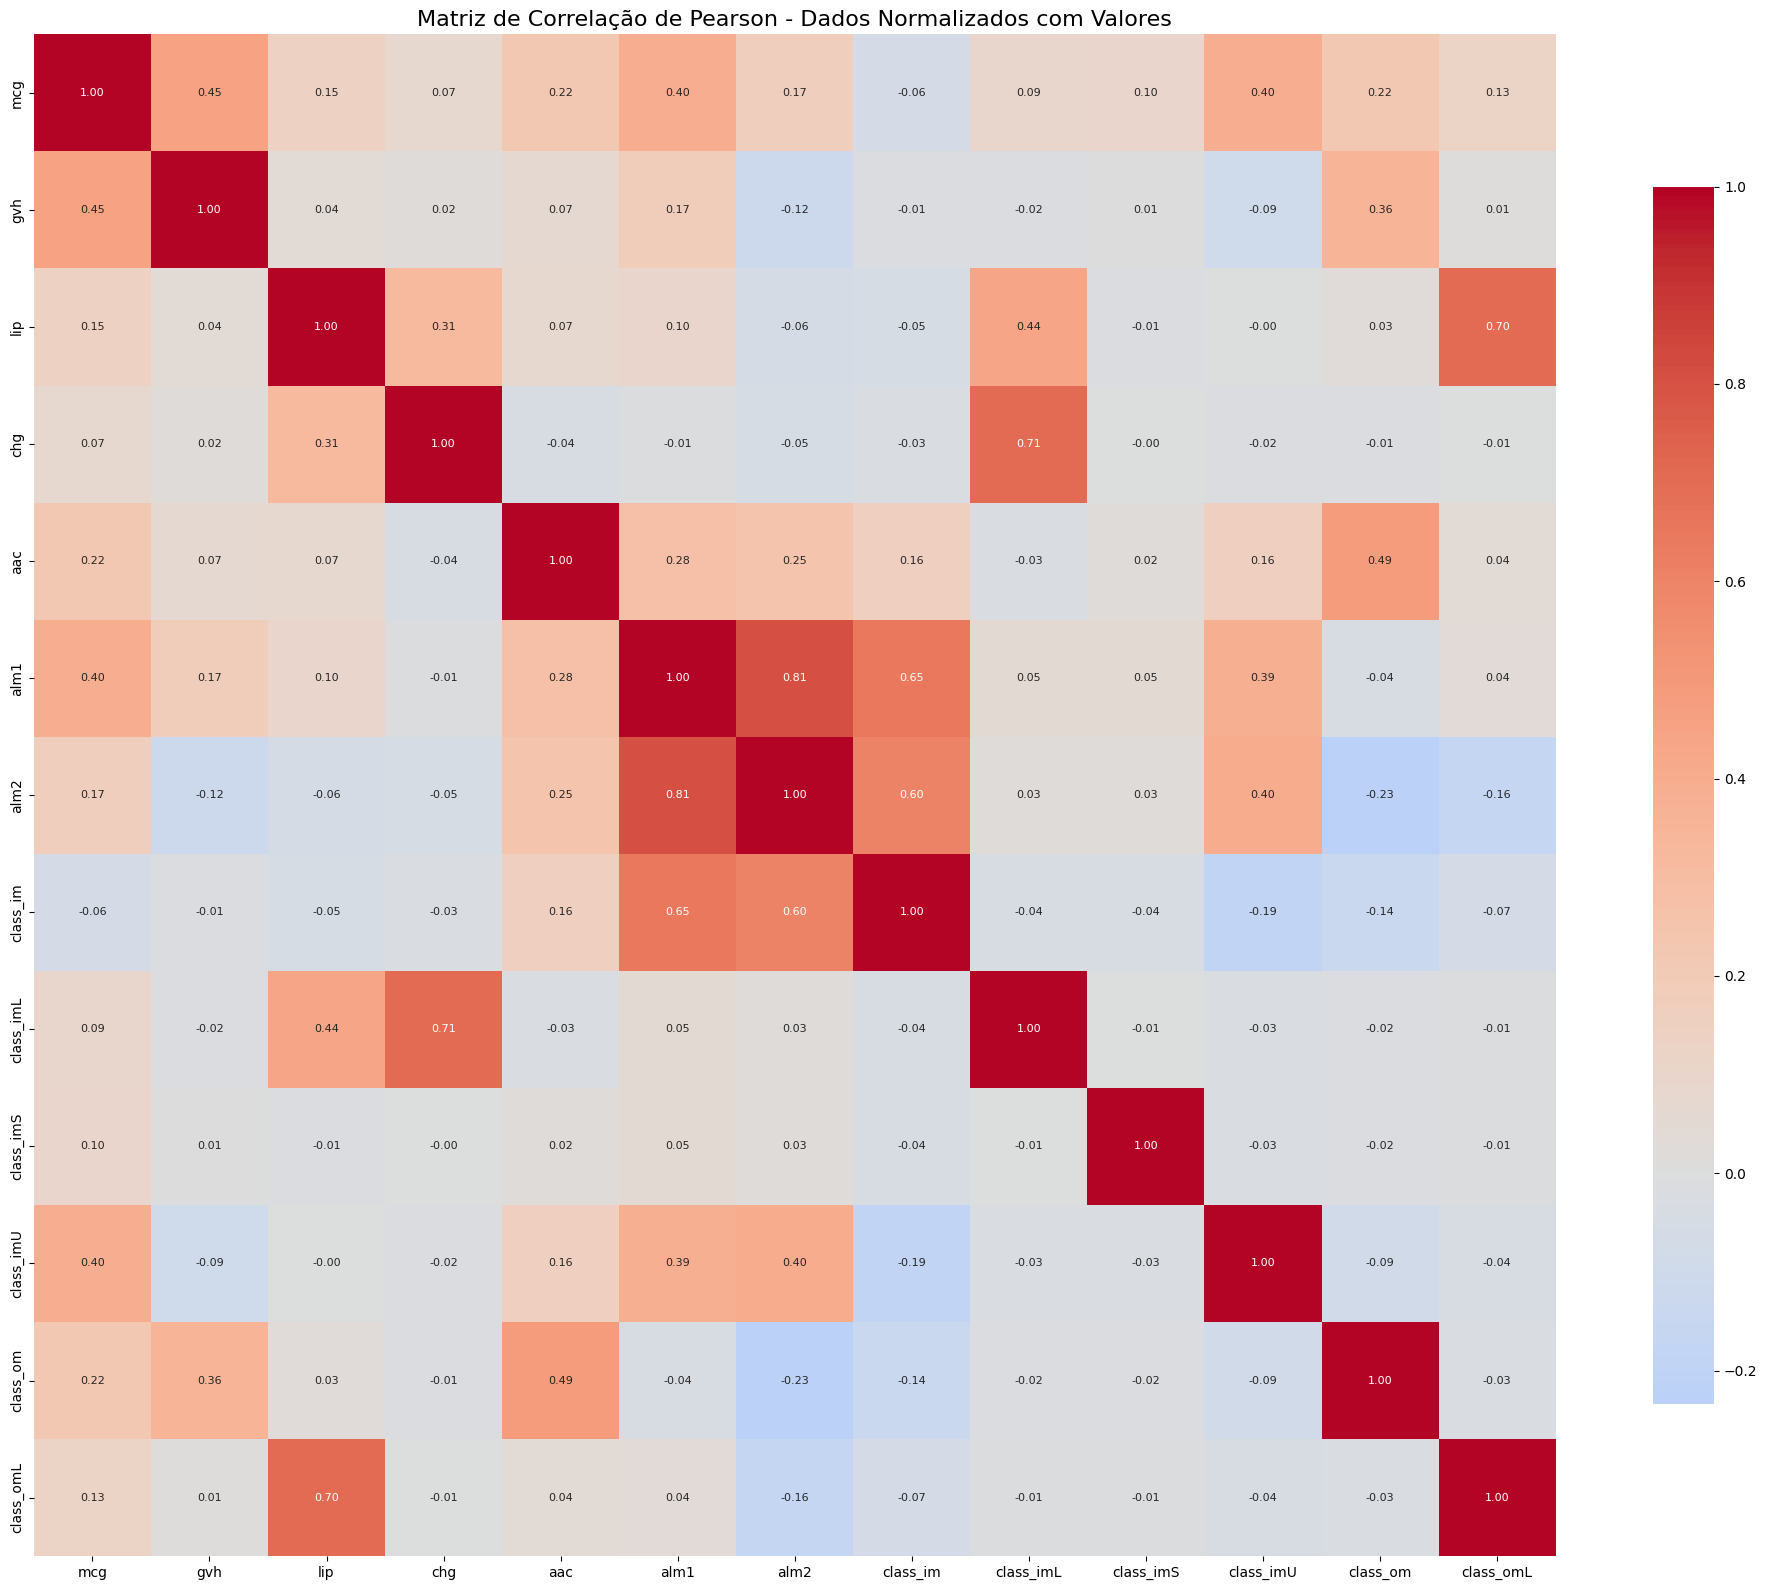

In [21]:
# Visualização da matriz de correlação: Matriz de correlação de Pearson
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlação com dados normalizados - COM LABELS
correlation_matrix_std = pd.DataFrame(X_std, columns=X.columns).corr()

# Visualização com labels
plt.figure(figsize=(20, 16))

# heatmap com annot=True para mostrar os valores
heatmap = sns.heatmap(
    correlation_matrix_std,
    annot=True,               # MOSTRA OS VALORES NOS QUADRADINHOS
    annot_kws={'size': 8},    # Tamanho da fonte dos annotations
    fmt='.2f',               # Formato: 2 casas decimais
    cmap='coolwarm',
    center=0,
    square=True,             # Quadrados perfeitos
    cbar_kws={'shrink': 0.8} # Barra de cores menor
)

plt.title('Matriz de Correlação de Pearson - Dados Normalizados com Valores', fontsize=16)
plt.tight_layout()
plt.show()

In [22]:
# Extraindo pares com alta correlação (>= 0.80)
upper = correlation_matrix_std.where(np.triu(np.ones(correlation_matrix_std.shape), k=1).astype(bool))
correlation_series = upper.unstack().sort_values(ascending=False).dropna()

# Convertendo para lista de tuplas (col1, col2, correlacao)
correlation_pairs = []
for (col1, col2), corr_value in correlation_series.items():
    if abs(corr_value) >= 0.80:
        correlation_pairs.append((col1, col2, corr_value))

# Verificando se temos pelo menos 20 pares
if len(correlation_pairs) < 20:
    print(f"Aviso: Apenas {len(correlation_pairs)} pares encontrados com correlação >= 0.80")
    top_pairs = correlation_pairs
else:
    top_pairs = correlation_pairs[:20]

print(f"\nTotal de pares com correlação >= 0.80: {len(correlation_pairs)}")

# CRIANDO DATASET REDUZIDO POR CORRELAÇÃO
from collections import defaultdict

# 1. Identificar variáveis para remover (usando correlation_pairs da célula anterior)
correlation_graph = defaultdict(list)
for col1, col2, corr in correlation_pairs:
    correlation_graph[col1].append((col2, corr))
    correlation_graph[col2].append((col1, corr))

columns_to_remove = set()
visited = set()
sorted_columns = sorted(correlation_graph.keys(),
                       key=lambda x: len(correlation_graph[x]),
                       reverse=True)

for col in sorted_columns:
    if col not in visited:
        visited.add(col)
        for correlated_col, _ in correlation_graph[col]:
            if correlated_col not in visited:
                columns_to_remove.add(correlated_col)
                visited.add(correlated_col)

# VERIFICAR SE X FOI ATUALIZADO PELO PROCESSAMENTO CATEGÓRICO
if 'dataset_processed' in locals():
    # Se houve processamento, usar features atualizadas
    X = dataset_processed.iloc[:, :-1]  # Features processadas
    y = dataset_processed.iloc[:, -1]   # Target
    print("Usando features processadas do dataset_processed")
else:
    # Se não houve processamento, usar features originais
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]
    print("Usando features originais do dataset")

# 2. Criar dataset reduzido
X_reduced = X.drop(columns=columns_to_remove)
X_reduced_std = StandardScaler().fit_transform(X_reduced)  # Normalizar o dataset reduzido

# Extraindo nome base do arquivo URL
base_name = url.split('/')[-1].replace('.csv', '')

# Criar correlation_dataset se não existir
if 'correlation_dataset' not in locals():
    correlation_dataset = pd.concat([X_reduced, y], axis=1)

correlation_dataset.to_csv(f'{base_name}_correlation_reduced.csv', index=False)

print(f"Dataset reduzido: {X.shape} -> {X_reduced.shape}")
print(f"Features removidas: {sorted(columns_to_remove)}")
print(f"Arquivo salvo: {base_name}_correlation_reduced.csv")

Aviso: Apenas 1 pares encontrados com correlação >= 0.80

Total de pares com correlação >= 0.80: 1
Usando features processadas do dataset_processed
Dataset reduzido: (336, 13) -> (336, 12)
Features removidas: ['alm1']
Arquivo salvo: Ecoli_correlation_reduced.csv


##PCA com raiz de n componentes e com >=90%


In [23]:
# DEFINA AQUI O NÚMERO DE COMPONENTES DESEJADO
#numero_componentes = 27  # ← Altere este valor para 4, 5, 6, etc.
# Calculando raiz quadrada do número de instâncias, limitado pelo número de features
n_instancias = X_reduced_std.shape[0] # Use X_reduced_std for instance count
n_features = X_reduced_std.shape[1] # Use X_reduced_std for feature count
numero_componentes = min(int(np.sqrt(n_instancias)), n_features) # Para raiz de n > numero de features -> escolhe o menor (não tem sentido PCA, já que não reduz dimensionalidade)

print(f"Número de instâncias: {n_instancias}")
print(f"Número de features: {n_features}")
print(f"Raiz quadrada de n: {np.sqrt(n_instancias):.2f}")
print(f"Número de componentes PCA: {numero_componentes}")

## Execução do PCA
pca_custom = PCA(n_components=numero_componentes)
pca_result_custom = pca_custom.fit_transform(X_reduced_std)

### Análise detalhada dos resultados
print("=" * 60)
print(f"ANÁLISE PCA COM {numero_componentes} COMPONENTES")
print("=" * 60)

print(f"\nShape do resultado: {pca_result_custom.shape}")
print(f"Variância total explicada: {np.sum(pca_custom.explained_variance_ratio_):.4f} ({np.sum(pca_custom.explained_variance_ratio_)*100:.2f}%)")

print(f"\nVariância explicada por componente:")
for i, var in enumerate(pca_custom.explained_variance_ratio_):
    print(f"  PC{i+1}: {var:.4f} ({var*100:.2f}%)")

print(f"\nVariância acumulada:")
cumulative_var = np.cumsum(pca_custom.explained_variance_ratio_)
for i, cum_var in enumerate(cumulative_var):
    print(f"  PC1 a PC{i+1}: {cum_var:.4f} ({cum_var*100:.2f}%)")

### Informações adicionais
print(f"\nAutovalores (explained variance): {pca_custom.explained_variance_}")
print(f"Singular values: {pca_custom.singular_values_}")

### Recomendações
if np.sum(pca_custom.explained_variance_ratio_) < 0.7:
    print(f"\n⚠️  ATENÇÃO: Apenas {np.sum(pca_custom.explained_variance_ratio_)*100:.1f}% da variância explicada.")
    print("Recomenda-se aumentar o número de componentes para melhor representação.")
elif np.sum(pca_custom.explained_variance_ratio_) < 0.9:
    print(f"\n✅ Bom: {np.sum(pca_custom.explained_variance_ratio_)*100:.1f}% da variância explicada.")
    print("Representação adequada para a maioria das aplicações.")
else:
    print(f"\n{np.sum(pca_custom.explained_variance_ratio_)*100:.1f}% da variância explicada!")

Número de instâncias: 336
Número de features: 12
Raiz quadrada de n: 18.33
Número de componentes PCA: 12
ANÁLISE PCA COM 12 COMPONENTES

Shape do resultado: (336, 12)
Variância total explicada: 1.0000 (100.00%)

Variância explicada por componente:
  PC1: 0.1856 (18.56%)
  PC2: 0.1639 (16.39%)
  PC3: 0.1508 (15.08%)
  PC4: 0.1154 (11.54%)
  PC5: 0.1080 (10.80%)
  PC6: 0.0864 (8.64%)
  PC7: 0.0820 (8.20%)
  PC8: 0.0297 (2.97%)
  PC9: 0.0277 (2.77%)
  PC10: 0.0255 (2.55%)
  PC11: 0.0129 (1.29%)
  PC12: 0.0122 (1.22%)

Variância acumulada:
  PC1 a PC1: 0.1856 (18.56%)
  PC1 a PC2: 0.3495 (34.95%)
  PC1 a PC3: 0.5003 (50.03%)
  PC1 a PC4: 0.6156 (61.56%)
  PC1 a PC5: 0.7236 (72.36%)
  PC1 a PC6: 0.8100 (81.00%)
  PC1 a PC7: 0.8920 (89.20%)
  PC1 a PC8: 0.9217 (92.17%)
  PC1 a PC9: 0.9494 (94.94%)
  PC1 a PC10: 0.9749 (97.49%)
  PC1 a PC11: 0.9878 (98.78%)
  PC1 a PC12: 1.0000 (100.00%)

Autovalores (explained variance): [2.23341897 1.97264496 1.81487544 1.38864523 1.29942639 1.03993066
 0.9

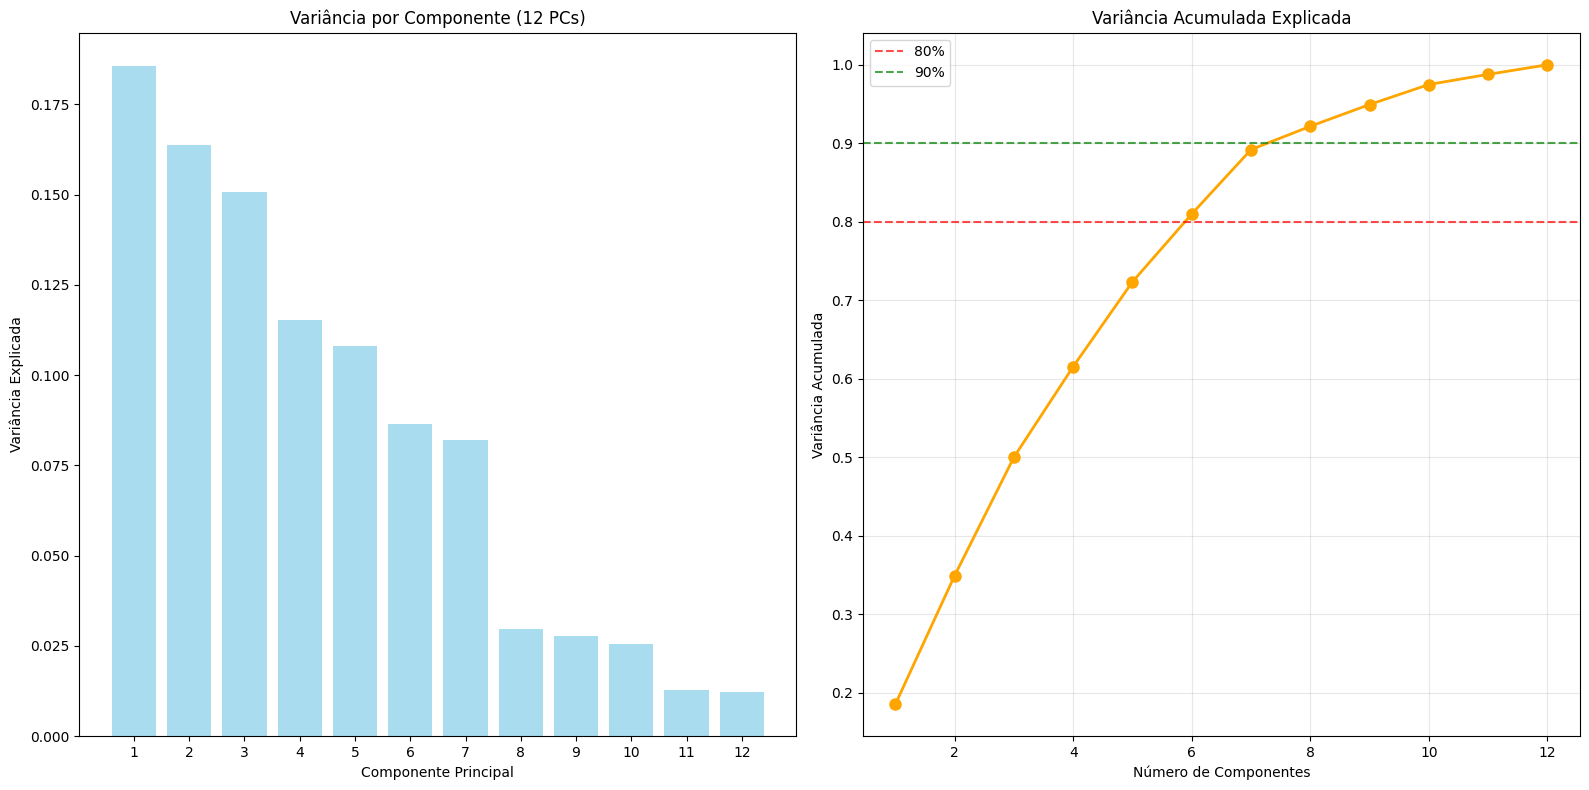

In [24]:
# Visualização gráfica da variância explicada
plt.figure(figsize=(16, 8))

# Gráfico de variância por componente
plt.subplot(1, 2, 1)
components = range(1, numero_componentes + 1)
plt.bar(components, pca_custom.explained_variance_ratio_, alpha=0.7, color='skyblue')
plt.xlabel('Componente Principal')
plt.ylabel('Variância Explicada')
plt.title(f'Variância por Componente ({numero_componentes} PCs)')
plt.xticks(components)

# Gráfico de variância acumulada
plt.subplot(1, 2, 2)
plt.plot(components, cumulative_var, 'o-', linewidth=2, color='orange', markersize=8)
plt.axhline(y=0.8, color='red', linestyle='--', alpha=0.7, label='80%')
plt.axhline(y=0.9, color='green', linestyle='--', alpha=0.7, label='90%')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Acumulada')
plt.title('Variância Acumulada Explicada')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

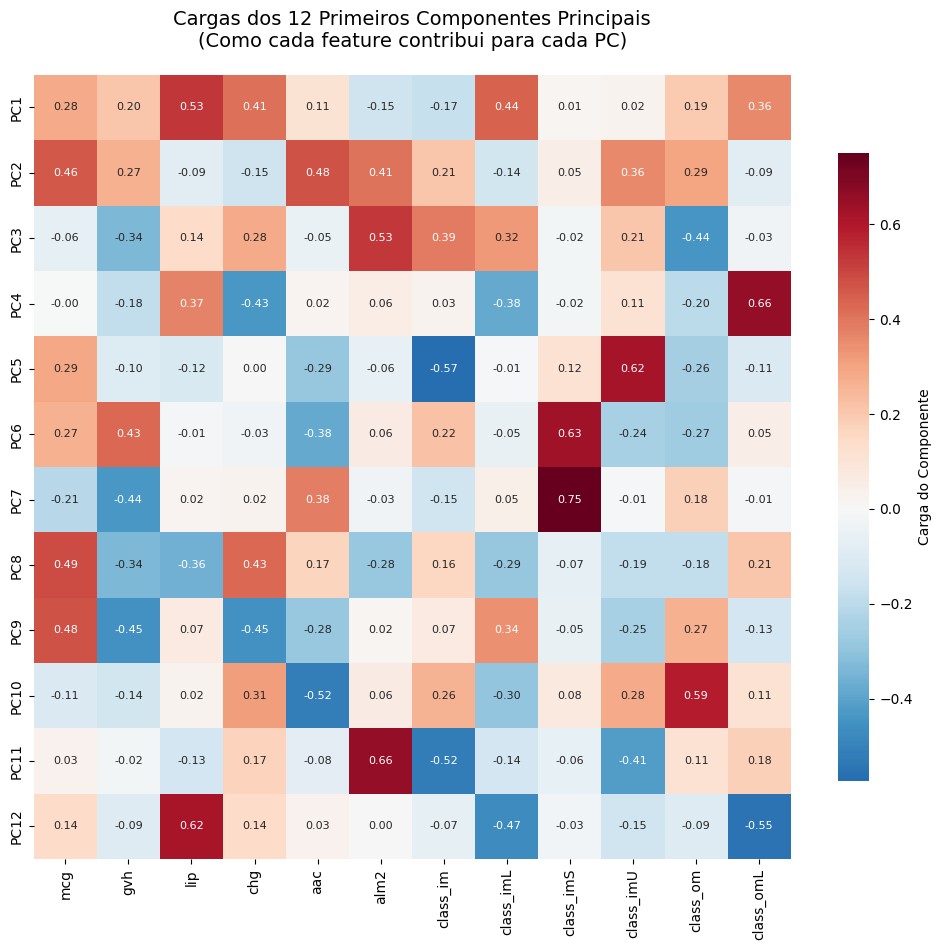

Tamanho da figura: 10.0 x 9.6 polegadas
Mostrando 12 componentes de 12 totais


In [25]:
# Heatmap das cargas dos componentes com dimensionamento automático
import math

# Calculando o tamanho da figura baseado no número de componentes e features
n_components_show = min(numero_componentes, 40)  # Mostra no máximo 40 componentes
n_features = len(X_reduced.columns) # Use X_reduced.columns for feature count

# Proporção quase quadrada: altura baseada no número de componentes, largura baseada no número de features
fig_height = max(6, n_components_show * 0.8)  # Mínimo de 6, +0.8 por componente
fig_width = max(10, n_features * 0.5)         # Mínimo de 10, +0.5 por feature

# Limitando o tamanho máximo para não ficar gigante
fig_height = min(fig_height, 20)
fig_width = min(fig_width, 30)

plt.figure(figsize=(fig_width, fig_height))

component_loadings = pd.DataFrame(
    pca_custom.components_[:n_components_show],
    columns=X_reduced.columns,  # Use X_reduced.columns
    index=[f'PC{i+1}' for i in range(n_components_show)]
)

heatmap = sns.heatmap(
    component_loadings,
    annot=True,
    cmap='RdBu_r',
    center=0,
    fmt='.2f',
    annot_kws={'size': 8},
    cbar_kws={'label': 'Carga do Componente', 'shrink': 0.8},
    square=False  # Não forçar quadrados perfeitos para muitos features
)

plt.title(f'Cargas dos {n_components_show} Primeiros Componentes Principais\n(Como cada feature contribui para cada PC)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print(f"Tamanho da figura: {fig_width:.1f} x {fig_height:.1f} polegadas")
print(f"Mostrando {n_components_show} componentes de {numero_componentes} totais")

In [26]:
### PCA com percentual de variância
from sklearn.decomposition import PCA

# DEFINA AQUI O PERCENTUAL DESEJADO
percentual_variancia = 0.90  # ← Altere para 0.75, 0.80, 0.95, etc.

## Execução do PCA
pca_percent = PCA(n_components=percentual_variancia, whiten=True)
pca_result_percent = pca_percent.fit_transform(X_reduced_std)

### Análise dos resultados
print("=" * 60)
print(f"ANÁLISE PCA COM {percentual_variancia*100}% DE VARIÂNCIA")
print("=" * 60)

print(f"\nShape do resultado: {pca_result_percent.shape}")
print(f"Número de componentes: {pca_percent.n_components_}")
print(f"Variância total explicada: {np.sum(pca_percent.explained_variance_ratio_):.4f} ({np.sum(pca_percent.explained_variance_ratio_)*100:.2f}%)")

print(f"\nVariância explicada por componente:")
for i, var in enumerate(pca_percent.explained_variance_ratio_):
    print(f"  PC{i+1}: {var:.4f} ({var*100:.2f}%)")

ANÁLISE PCA COM 90.0% DE VARIÂNCIA

Shape do resultado: (336, 8)
Número de componentes: 8
Variância total explicada: 0.9217 (92.17%)

Variância explicada por componente:
  PC1: 0.1856 (18.56%)
  PC2: 0.1639 (16.39%)
  PC3: 0.1508 (15.08%)
  PC4: 0.1154 (11.54%)
  PC5: 0.1080 (10.80%)
  PC6: 0.0864 (8.64%)
  PC7: 0.0820 (8.20%)
  PC8: 0.0297 (2.97%)


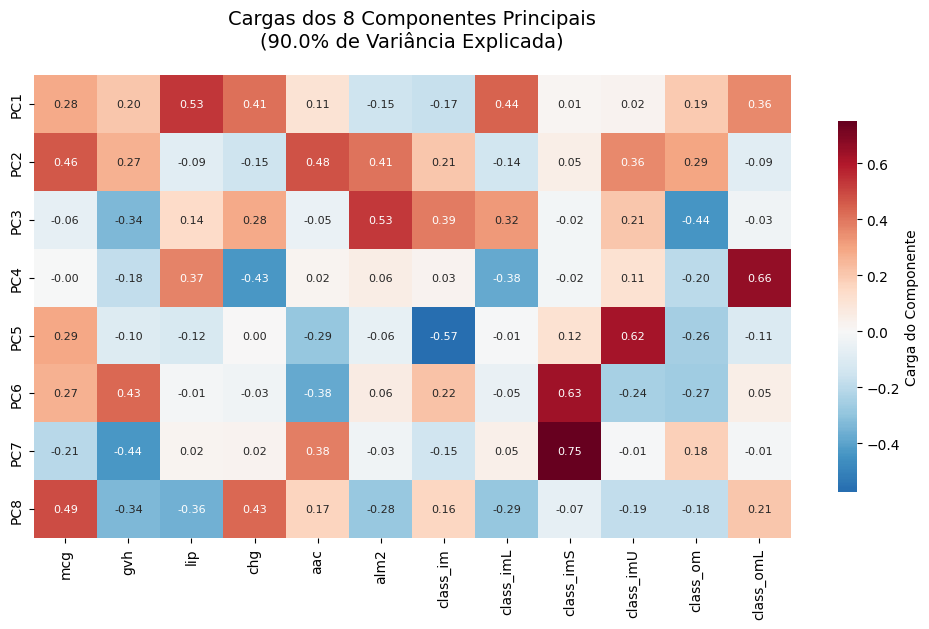

Tamanho da figura: 10.0 x 6.4 polegadas
Mostrando 8 componentes de 8 totais
Variância total explicada: 0.9217


In [27]:
# Heatmap das cargas para PCA percentual
n_components_show = min(pca_percent.n_components_, 40)
n_features = len(X_reduced.columns)  # ← CORRIGIDO: X_reduced.columns ao invés de X.columns

fig_height = max(6, n_components_show * 0.8)
fig_width = max(10, n_features * 0.5)  # ← Agora usa o número de features REDUZIDAS

fig_height = min(fig_height, 20)
fig_width = min(fig_width, 30)

plt.figure(figsize=(fig_width, fig_height))

component_loadings = pd.DataFrame(
    pca_percent.components_[:n_components_show],
    columns=X_reduced.columns,  # ← CORRIGIDO: X_reduced.columns
    index=[f'PC{i+1}' for i in range(n_components_show)]
)

sns.heatmap(
    component_loadings,
    annot=True,
    cmap='RdBu_r',
    center=0,
    fmt='.2f',
    annot_kws={'size': 8},
    cbar_kws={'label': 'Carga do Componente', 'shrink': 0.8},
    square=False
)

plt.title(f'Cargas dos {n_components_show} Componentes Principais\n({percentual_variancia*100}% de Variância Explicada)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print(f"Tamanho da figura: {fig_width:.1f} x {fig_height:.1f} polegadas")
print(f"Mostrando {n_components_show} componentes de {pca_percent.n_components_} totais")
print(f"Variância total explicada: {np.sum(pca_percent.explained_variance_ratio_):.4f}")

In [14]:
# Extraindo nome base do arquivo URL
base_name = url.split('/')[-1].replace('.csv', '')

# Salvando bases PCA com nome dinâmico (usando dataset REDUZIDO)
pd.DataFrame(pca_result_custom).to_csv(f'{base_name}_pca_sqrt_n.csv', index=False)

# CORRIGIR: usar X_reduced_std ao invés de X_std
pca_90 = PCA(n_components=0.90)
pca_result_90 = pca_90.fit_transform(X_reduced_std)  # ← CORRIGIDO
pd.DataFrame(pca_result_90).to_csv(f'{base_name}_pca_90percent.csv', index=False)

print(f"Bases salvas para {base_name}:")
print(f"- {base_name}_pca_sqrt_n.csv")
print(f"- {base_name}_pca_90percent.csv")


Bases salvas para Waveform:
- Waveform_pca_sqrt_n.csv
- Waveform_pca_90percent.csv
